In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [2]:
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    score= sentiment_dict['compound']
    if sentiment_dict['compound'] >= 0.05:
        overall= 'pos'



    elif sentiment_dict['compound'] <= -0.05:
        overall = 'neg'

    else:
        overall= 'neu'
    return overall

In [3]:
df = pd.read_csv(r'C:\Users\Wei\Desktop\Yelp project\sentiment_test(1).csv')

df



,Unnamed: 0,id,data,label,food_entity,new_review,sentiment_truth
0,0,1,Great restaurant with a good atmosphere and it...,"[257, 272, 'Food']",shrimp cocktail,The shrimp cocktail was the highlight from the...,pos
1,1,1,Great restaurant with a good atmosphere and it...,"[732, 739, 'Food']",burgers,"My friends had a couple of burgers, and lobste...",neu
2,2,1,Great restaurant with a good atmosphere and it...,"[745, 758, 'Food']",lobster rolls,"My friends had a couple of burgers, and lobste...",neu
3,3,2,Three words: boxed mashed potatoes.\n\nUnaccep...,"[157, 171, 'Food']",shepherd's pie,"The shepherd's pie had canned corn, canned pea...",neg
4,4,6,The real reason to walk in the door is the ext...,"[624, 643, 'Food']",chicken caesar wrap,"I get the chicken caesar wrap, ordered with b...",pos
...,...,...,...,...,...,...,...
421,421,727,Although I basically work across the street fr...,"[264, 280, 'Food']",hot vanilla Chai,I had a hot vanilla Chai but it hit the spot...,neu
422,422,734,I don't know what it is with everybody and the...,"[85, 99, 'Food']",Breakfast Club,I don't know what it is with everybody and the...,neg
423,423,734,I don't know what it is with everybody and the...,"[432, 443, 'Food']",the Teacher,My friend got the Teacher -- two eggs any styl...,neu
424,424,739,Stumbled upon Posto while visiting a friend in...,"[104, 114, 'Food']",short ribs,The short ribs were so good that I dreamt of ...,pos


In [4]:
df['sentiment'] = df['new_review'].map(lambda x: sentiment_scores(x))
df


,Unnamed: 0,id,data,label,food_entity,new_review,sentiment_truth,sentiment
0,0,1,Great restaurant with a good atmosphere and it...,"[257, 272, 'Food']",shrimp cocktail,The shrimp cocktail was the highlight from the...,pos,pos
1,1,1,Great restaurant with a good atmosphere and it...,"[732, 739, 'Food']",burgers,"My friends had a couple of burgers, and lobste...",neu,pos
2,2,1,Great restaurant with a good atmosphere and it...,"[745, 758, 'Food']",lobster rolls,"My friends had a couple of burgers, and lobste...",neu,pos
3,3,2,Three words: boxed mashed potatoes.\n\nUnaccep...,"[157, 171, 'Food']",shepherd's pie,"The shepherd's pie had canned corn, canned pea...",neg,neg
4,4,6,The real reason to walk in the door is the ext...,"[624, 643, 'Food']",chicken caesar wrap,"I get the chicken caesar wrap, ordered with b...",pos,pos
...,...,...,...,...,...,...,...,...
421,421,727,Although I basically work across the street fr...,"[264, 280, 'Food']",hot vanilla Chai,I had a hot vanilla Chai but it hit the spot...,neu,neu
422,422,734,I don't know what it is with everybody and the...,"[85, 99, 'Food']",Breakfast Club,I don't know what it is with everybody and the...,neg,neu
423,423,734,I don't know what it is with everybody and the...,"[432, 443, 'Food']",the Teacher,My friend got the Teacher -- two eggs any styl...,neu,pos
424,424,739,Stumbled upon Posto while visiting a friend in...,"[104, 114, 'Food']",short ribs,The short ribs were so good that I dreamt of ...,pos,pos


In [5]:
actual=df['sentiment_truth']
predictions=df['sentiment']
average = 'weighted'
print("The precision of our Vader model is: %.3f " % precision_score(actual, predictions, average=average))

print("The recall of our Vader model is: %.3f " % recall_score(actual, predictions, average=average))

print("The F1 score of our Vader model is: %.3f " % f1_score(actual, predictions, average=average))
print("The accuracy of our Vader model is: %.3f " % accuracy_score(actual, predictions,normalize = True))


The precision of our Vader model is: 0.716 
The recall of our Vader model is: 0.723 
The F1 score of our Vader model is: 0.716 
The accuracy of our Vader model is: 0.723 


In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Flair's Confusion matrix",
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

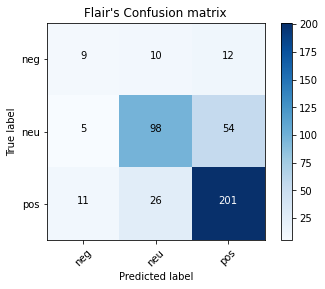

In [7]:

confusion_mtx = confusion_matrix(actual, predictions) 
plot_confusion_matrix(confusion_mtx, classes = ['neg','neu','pos'])
plt.show()

FLAIR Model




In [8]:
from flair.models import TextClassifier
from flair.data import Sentence
import flair, torch
from segtok.segmenter import split_single

flair.device = torch.device('cuda') 


classifier = TextClassifier.load('en-sentiment')


def text_sentiment_flair(text):
  sentence = Sentence(text)
  classifier.predict(sentence)
  return sentence.labels[0].value


flair.device

2021-12-08 18:04:04,759 loading file C:\Users\Wei\.flair\models\sentiment-en-mix-distillbert_4.pt


device(type='cuda')

In [9]:
def predict(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    text = Sentence(sentence)
    # stacked_embeddings.embed(text)
    classifier.predict(text)
    value = text.labels[0].to_dict()['value'] 
    if value == 'POSITIVE':
        result = text.to_dict()['labels'][0]['confidence']
    else:
        result = -(text.to_dict()['labels'][0]['confidence'])
    return round(result, 3)
def make_sentences(text):
    """ Break apart text into a list of sentences """
    sentences = [sent for sent in split_single(text)]
    return sentences
def get_scores(sentences):
    """ Call predict on every sentence of a text """
    results = []
    
    for i in range(0, len(sentences)): 
        results.append(predict(sentences[i]))
    return results

def get_sum(scores):
    
    result = round(sum(scores), 3)
    if result >= 0.5:
        overall= 'pos'
   
    elif result <= -0.5:
        overall = 'neg'

    else:
        overall= 'neu'
    return overall


In [10]:
df1=df
df1['new_review'] = df1.new_review.apply(make_sentences)
df1['scores'] = df1['new_review'].apply(get_scores)
df1['scores_sum'] = df1.scores.apply(get_sum)

In [11]:
df1

,Unnamed: 0,id,data,label,food_entity,new_review,sentiment_truth,sentiment,scores,scores_sum
0,0,1,Great restaurant with a good atmosphere and it...,"[257, 272, 'Food']",shrimp cocktail,[The shrimp cocktail was the highlight from th...,pos,pos,[0.945],pos
1,1,1,Great restaurant with a good atmosphere and it...,"[732, 739, 'Food']",burgers,"[My friends had a couple of burgers, and lobst...",neu,pos,[0.99],pos
2,2,1,Great restaurant with a good atmosphere and it...,"[745, 758, 'Food']",lobster rolls,"[My friends had a couple of burgers, and lobst...",neu,pos,[0.99],pos
3,3,2,Three words: boxed mashed potatoes.\n\nUnaccep...,"[157, 171, 'Food']",shepherd's pie,"[The shepherd's pie had canned corn, canned pe...",neg,neg,[-1.0],neg
4,4,6,The real reason to walk in the door is the ext...,"[624, 643, 'Food']",chicken caesar wrap,"[I get the chicken caesar wrap, ordered with b...",pos,pos,[-1.0],neg
...,...,...,...,...,...,...,...,...,...,...
421,421,727,Although I basically work across the street fr...,"[264, 280, 'Food']",hot vanilla Chai,[I had a hot vanilla Chai but it hit the spot ...,neu,neu,[-0.523],neg
422,422,734,I don't know what it is with everybody and the...,"[85, 99, 'Food']",Breakfast Club,[I don't know what it is with everybody and th...,neg,neu,[-0.778],neg
423,423,734,I don't know what it is with everybody and the...,"[432, 443, 'Food']",the Teacher,[My friend got the Teacher -- two eggs any sty...,neu,pos,[0.79],pos
424,424,739,Stumbled upon Posto while visiting a friend in...,"[104, 114, 'Food']",short ribs,[The short ribs were so good that I dreamt of ...,pos,pos,[0.999],pos


In [ ]:
#df1['sentiment'] = df1['text'].map(lambda x : text_sentiment_flair(x))

In [ ]:
#df1['review_stars'].astype(int)
#df1['ground_truth'] = df1['review_stars'].apply(lambda x: 'NEGATIVE' if x <= 3 else 'POSITIVE')
#df1

In [13]:
actual=df1['sentiment_truth']
predictions=df1['scores_sum']

average = 'weighted'
print("The precision of our Flair model is: %.3f " % precision_score(actual, predictions,average=average))

print("The recall of our Flair model is: %.3f " % recall_score(actual, predictions,average=average))

print("The F1 score of our Flair model is: %.3f " % f1_score(actual, predictions,average=average))
print("The accuracy of our Flair model is: %.3f " % accuracy_score(actual, predictions,normalize = True))


The precision of our Flair model is: 0.383 
The recall of our Flair model is: 0.542 
The F1 score of our Flair model is: 0.444 
The accuracy of our Flair model is: 0.542 


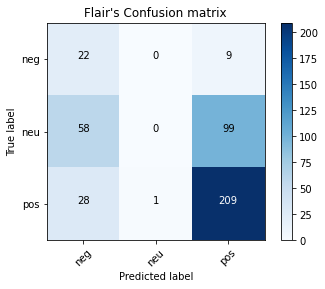

In [14]:
confusion_mtx = confusion_matrix(actual, predictions) 
plot_confusion_matrix(confusion_mtx, classes =['neg','neu','pos'])
plt.show()